In [130]:
import torch
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, ConcatDataset

from models import *

In [131]:
n_epochs = 3
log_interval = 10

torch.backends.cudnn.enabled = False
torch.manual_seed(1)

In [132]:
trainset = torchvision.datasets.MNIST('./data/', train=True, download=True,
                              transform=torchvision.transforms.Compose([
                              torchvision.transforms.ToTensor(),
                              torchvision.transforms.Normalize(
                              (0.1307,), (0.3081,))]))
testset = torchvision.datasets.MNIST('./data/', train=False, download=True,
                              transform=torchvision.transforms.Compose([
                              torchvision.transforms.ToTensor(),
                              torchvision.transforms.Normalize(
                              (0.1307,), (0.3081,))]))

# train_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
# test_loader = torch.utils.data.DataLoader(trainset, batch_size=1000, shuffle=True)

In [133]:
# examples = enumerate(test_loader)
# batch_idx, (example_data, example_targets) = next(examples)

In [134]:
# fig = plt.figure(figsize=(10, 8))
# for i in range(6):
#   plt.subplot(2,3,i+1)
#   plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
#   plt.xticks([])
#   plt.yticks([])

In [135]:
#Adding gaussian noise to the training set
trainset_noise = trainset.data + torch.randn(trainset.data.size())*128
testset_noise = testset.data + torch.randn(testset.data.size())*128

# concat_train_dataset = ConcatDataset([trainset_noise, trainset.data])
# concat_test_dataset = ConcatDataset([testset_noise, testset.data])
train_dataset_full = torch.utils.data.TensorDataset(trainset_noise, trainset.data)
test_dataset_full = torch.utils.data.TensorDataset(testset_noise, testset.data)

In [136]:
batch_size_train = 64
batch_size_test = 64

In [137]:
train_loader1 = torch.utils.data.DataLoader(train_dataset_full, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset_full, batch_size=batch_size_test, shuffle=True)

In [138]:
examples = enumerate(train_loader1)
batch_idx, (example_data, example_targets) = next(examples)
# print(example_data)
print(example_data.shape, example_targets.shape)

torch.Size([64, 28, 28]) torch.Size([64, 28, 28])


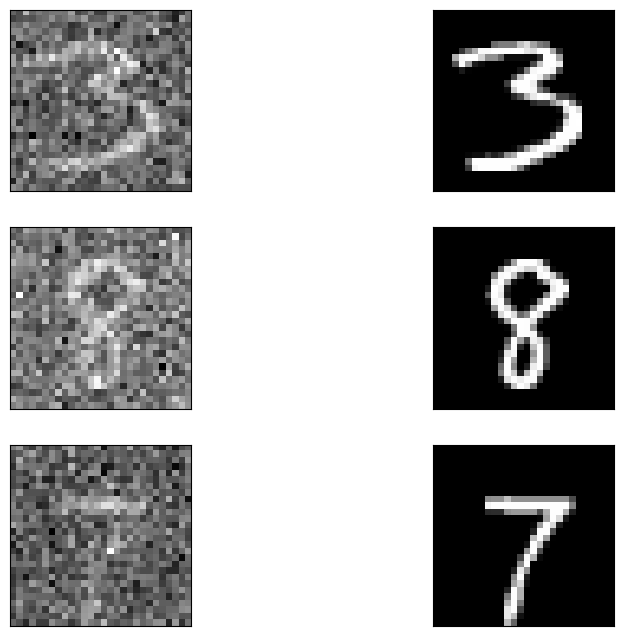

In [139]:
fig = plt.figure(figsize=(10, 8))
for i in range(0,6,2):
  # print(example_data[i].shape)
  plt.subplot(3,2,i+1)
  plt.imshow(example_data[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,2,i+2)
  plt.imshow(example_targets[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [140]:
model = CONV()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [141]:
train_losses = []
test_losses = []
num_epochs = 5

model.train()
for i, (x, y) in enumerate(train_loader):
    optimizer.zero_grad()
    preds = model(x)
    loss = torch.nn.MSELoss(preds, y)
    loss.backward()
    optimizer.step()
    print(f'Epoch: [{i+1}/{num_epochs}] \t Loss: {loss:.4f}')
    train_losses.append(loss.item())

RuntimeError: Boolean value of Tensor with more than one value is ambiguous